# Importing necessary modules

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading dataset

In [6]:
parquet_file=r'C:/Users/Acer/Downloads/data.parquet'
data = pd.read_parquet(parquet_file,engine='auto')


# Handling missing values by filling with the mean of the previous 10 data points and calculating spread

In [7]:
data.fillna(data.rolling(10, min_periods=1).mean(), inplace=True)
data['Spread'] = data['banknifty'] - data['nifty']

# Implementing Bollinger bands strategy

In [8]:
# Calculating moving average of previous 20 spreads
data['MA_20'] = data['Spread'].rolling(window=20).mean()

# Calculating 2-standard deviation Bollinger Bands
data['Upper_Band'] = data['MA_20'] + 0.5 * data['Spread'].rolling(window=20).std()
data['Lower_Band'] = data['MA_20'] - 0.5 * data['Spread'].rolling(window=20).std()

# Generate trading signals based on Bollinger Bands
data['Signal'] = np.where(data['Spread'] > data['Upper_Band'], -1,
                          np.where(data['Spread'] < data['Lower_Band'], 1, 0))
# Calculate profit-loss (P/L) using the given formula
data['P_L'] = data['Spread'] * (data['tte'] ** 0.7) * data['Signal'].shift(1)

# Cumulative P/L
data['Cumulative_P_L'] = data['P_L'].cumsum()

# Plotting the Bollinger Bands

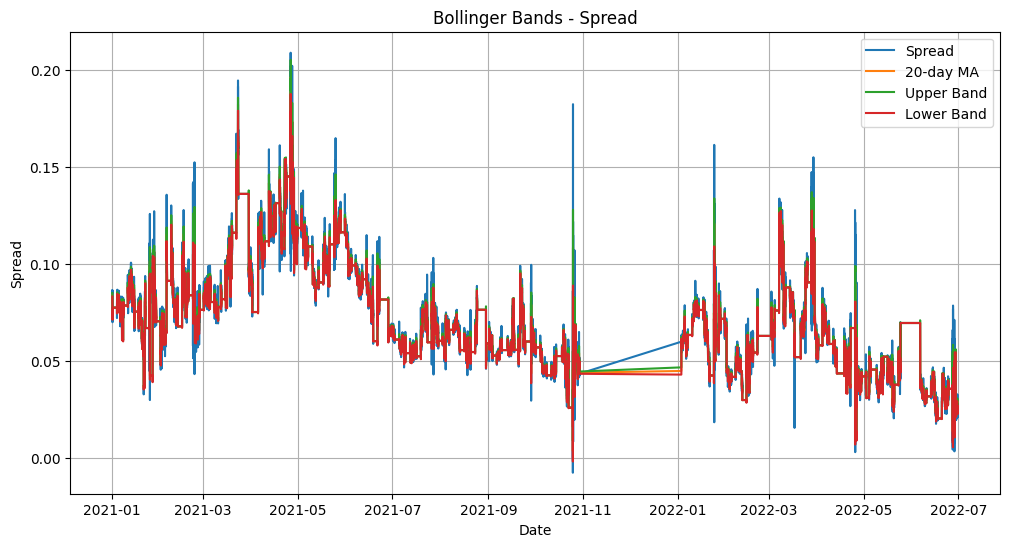

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Spread'], label='Spread')
plt.plot(data.index, data['MA_20'], label='20-day MA')
plt.plot(data.index, data['Upper_Band'], label='Upper Band')
plt.plot(data.index, data['Lower_Band'], label='Lower Band')
plt.title('Bollinger Bands - Spread')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the trading signals

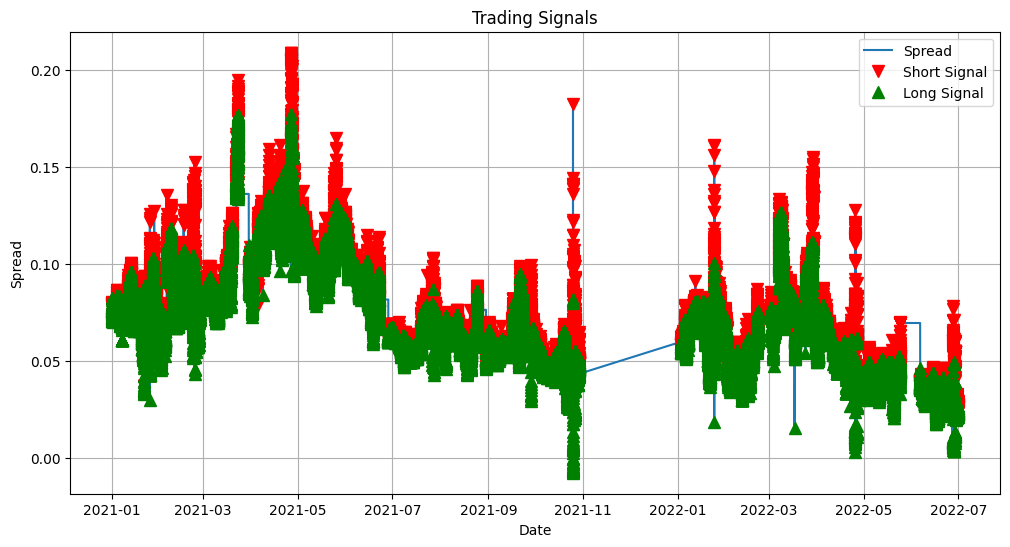

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Spread'], label='Spread')
plt.plot(data[data['Signal'] == -1].index, data['Spread'][data['Signal'] == -1], 'rv', markersize=8, label='Short Signal')
plt.plot(data[data['Signal'] == 1].index, data['Spread'][data['Signal'] == 1], 'g^', markersize=8, label='Long Signal')
plt.title('Trading Signals')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()

# Performance metrics

In [12]:
returns = data['P_L']
sharpe_ratio = (returns.mean()-0.001) / returns.std()
absolute_pl = data['Cumulative_P_L'].iloc[-1]
drawdown = (data['Cumulative_P_L'] - data['Cumulative_P_L'].cummax()).min()
print("Performance Metrics:")
print("Sharpe Ratio:", sharpe_ratio)
print("Absolute P/L:", absolute_pl)
print("Drawdown:", drawdown)

Performance Metrics:
Sharpe Ratio: -0.0030252545535649393
Absolute P/L: 269.2541689439011
Drawdown: -323.11172083038304
